Tensorflow constant

In [1]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)
sum = a+b
sess = tf.Session()
print(sess.run(sum))

/home/pranav/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


3


Tensorflow placeholder

In [2]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
sum = a+b
sess = tf.Session()
print(sess.run(sum,{a:[1,2],b:[3,4]}))

[4. 6.]


Tensorflow variable

In [3]:
#model parameters
W = tf.Variable([-1.0],tf.float32)
b = tf.Variable([1.0],tf.float32)
#i/p o/p
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
linear_model = W * x + b
delta_square = tf.square(y-linear_model)
loss = tf.reduce_sum(delta_square)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(loss,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

0.0


Simple Linear Regression in Tensorflow

In [4]:
#model parameters
W = tf.Variable([-1.0],tf.float32)
b = tf.Variable([1.0],tf.float32)
#i/p o/p
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
linear_model = W * x + b
#loss
delta_square = tf.square(y-linear_model)
loss = tf.reduce_sum(delta_square)
#optimize
optimizer = tf.train.GradientDescentOptimizer(0.01)
train =optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})
print(sess.run([W,b]))

[array([-1.], dtype=float32), array([1.], dtype=float32)]


Neural Network using Tensorflow

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def read_dataset():
    df = pd.read_csv('sonar.all-data')
    X = df.iloc[:,:60].values
    y = df[df.columns[-1]]
    print('df: ',df.shape)
    #encode the dependent vatiable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encoder(y)
    print('X.shape :',X.shape)
    return(X,Y)

def one_hot_encoder(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

X,Y = read_dataset()
X,Y = shuffle(X,Y,random_state=1)

#convert dataset into train-test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

#inspect the shape of training and testing data
print('train_x.shape :',train_x.shape)
print('train_y.shape :',train_y.shape)
print('test_x.shape :',test_x.shape)

In [ ]:
#define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 1001
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print('n_dim: ',n_dim)
n_class = 2
model_path = '/home/pranav/Downloads/my python projects/tensor_model/new'

In [ ]:
#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32,[None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_= tf.placeholder(tf.float32,[None,n_class])

In [ ]:
#Define the model
def multilayer_perceptron(x, weights, biases):
    #Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer

#define weights and biases for each layer

weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class])),    
}

biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class])),    
}

In [5]:
#initialize all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver() #save  model

#call your model defined
y = multilayer_perceptron(x,weights,biases)

#define cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

#calculate cost and accuracy for wach epoch
mse_history = []
accuracy_history=[]

df:  (207, 61)
X.shape : (207, 60)
train_x.shape : (165, 60)
train_y.shape : (165, 2)
test_x.shape : (42, 60)
n_dim:  60


In [6]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y = sess.run(y, feed_dict = {x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_= sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x:train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    if (epoch%50 == 0):
        print('epoch : ', epoch, 'cost : ', cost, '-MSE : ', mse_, 'Train Accuracy : ', accuracy)

epoch :  0 cost :  192.47263 -MSE :  45740.86756389842 Train Accuracy :  0.54545456
epoch :  50 cost :  0.67170376 -MSE :  0.7196550628827337 Train Accuracy :  0.55757576
epoch :  100 cost :  0.6377657 -MSE :  0.6743620398006567 Train Accuracy :  0.6121212
epoch :  150 cost :  0.5950832 -MSE :  0.735226244005385 Train Accuracy :  0.6666667
epoch :  200 cost :  0.5852213 -MSE :  1.3201640652469269 Train Accuracy :  0.6909091
epoch :  250 cost :  0.6683163 -MSE :  4.054756859252228 Train Accuracy :  0.57575756
epoch :  300 cost :  0.5057909 -MSE :  1.5296317172937774 Train Accuracy :  0.7939394
epoch :  350 cost :  0.5116733 -MSE :  1.8306790738617214 Train Accuracy :  0.73939395
epoch :  400 cost :  0.5149875 -MSE :  0.6166885494954001 Train Accuracy :  0.8121212
epoch :  450 cost :  0.41653922 -MSE :  4.819959963892769 Train Accuracy :  0.7939394
epoch :  500 cost :  0.393206 -MSE :  5.12228396657999 Train Accuracy :  0.7939394
epoch :  550 cost :  0.34895453 -MSE :  6.824231649345843 

In [7]:
save_path = saver.save(sess, model_path)
print('Model saved in file: %s' % save_path)

Model saved in file: /home/pranav/Downloads/my python projects/tensor_model/new


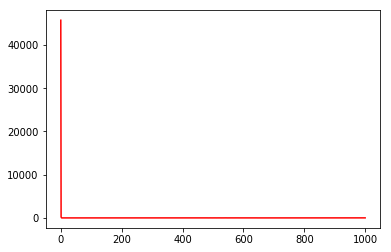

In [8]:
# plot mse and accuracy graph
plt.plot(mse_history, 'r')
plt.show()

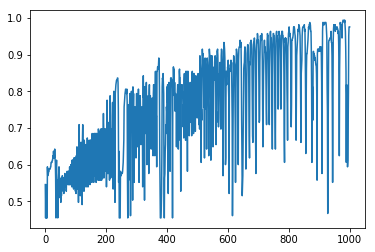

In [9]:
plt.plot(accuracy_history)
plt.show()

In [10]:
#print final accuracy
correction_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: ', (sess.run(accuracy,feed_dict={x:train_x, y_:train_y})))

Test accuracy:  0.9757576


In [11]:
#print final mean square errror
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE : %.4f' % sess.run(mse))

MSE : 9.7651


trying to reuse the model

model_path = '/home/pranav/Downloads/my python projects/tensor_model/new'
saver = tf.train.Saver()
saver.restore(sess,model_path)
prediction = tf.argmax(y,1)
correct_prediction = tf.equal(prediction, tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(93,101):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1,60)})